<a href="https://colab.research.google.com/github/you0229/kaggle_titanic/blob/master/main_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# libraries
import pandas as pd
import numpy as np
from keras import models
from keras import layers
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# データ読み込み
def read_data():
  print('Train data reading...')
  train = pd.read_csv('/content/drive/My Drive/MachineLeaning/kaggle_titanic/train.csv')
  print("Train data is column {}, rows: {}".format(train.shape[0], train.shape[1]))
  print('Test data reading...')
  test = pd.read_csv('/content/drive/My Drive/MachineLeaning/kaggle_titanic/test.csv')
  print("Test data is column {}, rows: {}".format(test.shape[0], test.shape[1]))

  return train, test

In [0]:
# データ整理
def pre_processing(train, test):
  # train と test を合わせて前処理
  print('Combine train and test')
  train['is_train'] = 1
  test['is_train'] = 0
  train_test = pd.concat([train.drop('Survived', axis=1),test], axis=0)

  # Sex
  print('Modifying Sex column')
  train_test = train_test.replace('female', 0).replace('male', 1)

  # Ticket
  print('Modifying Ticket column')
  ticket_to_num = {'A':0, 'P':1, 'S':2, '1':3, '3':4, '2':5, 'C':6, '7':7, 'W':8, '4':9, 'F':9, 'L':10, '9':11,'6':12, '5':13, '8':14}
  train_test['Ticket_Left'] = train_test['Ticket'].apply(lambda x: str(x)[0])
  train_test['Ticket_Left'] = train_test['Ticket_Left'].replace(ticket_to_num)
  train_test = train_test.drop('Ticket', axis=1)

  # Embarked
  print('Modifying Embarked column')
  embarked_to_num = {'S':0, 'C':1, 'Q':2}
  train_test['Embarked'] = train_test['Embarked'].replace(embarked_to_num)
  train_test['Embarked'] = train_test['Embarked'].fillna(train_test['Embarked'].mean())
  train_test = train_test.drop('Embarked', axis=1)

  # Cabin
  # 204/891 したデータが入っていないため削除
  print('Modifying Cabin column')
  train_test = train_test.drop('Cabin', axis=1)

  # Age
  # print('Modifying Age column')
  # train_test = train_test.dropna(subset=['Age'])

  # Name
  # 関係なさそうだから削除
  print('Modifying Name column')
  train_test = train_test.drop('Name', axis=1)

  # Fare
  # print('Modifying Fare column')
  # train_test = train_test.dropna(subset=['Fare'])

  # train test
  print('Split train and test')
  train_result = train_test.loc[train_test['is_train'] == 1]
  test_result = train_test.loc[train_test['is_train'] == 0]

  train_result = train_result.drop('is_train', axis=1)
  test_result = test_result.drop('is_train', axis=1)

  # add Survived
  train_result['Survived'] = train['Survived']

  # Delete Age and Fare
  train_result = train_result.dropna(subset=['Age', 'Fare'])
  test_result = test_result.dropna(subset=['Age', 'Fare'])

  return train_result, test_result

In [0]:
# モデル作成
def create_model(x):
  network = models.Sequential()
  network.add(layers.Dense(512, activation='relu', input_shape=(x.shape[1],)))
  network.add(layers.Dense(10,activation='softmax'))
  network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

  return network

In [0]:
# ラベルの処理
def data_to_categorical(labels):
  return to_categorical(labels)

In [0]:
# 学習
def model_fit(x, y):
  model = create_model(x)
  model.fit(x, y, epochs=3, batch_size=100)

In [0]:
# 評価

In [15]:
train, test = read_data()

Train data reading...
Train data is column 891, rows: 12
Test data reading...
Test data is column 418, rows: 11


In [16]:
train, test = pre_processing(train, test)

columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Ticket_Left']

train_data = train[columns].values
train_lavels = train['Survived'].values

x_train = np.asarray(train_data).astype('float32')
y_train = np.asarray(train_lavels).astype('float32')

test_data = test[columns].values.astype('float32')

Combine train and test
Modifying Sex column
Modifying Ticket column
Modifying Embarked column
Modifying Cabin column
Modifying Name column
Split train and test


In [0]:
#正規化
for i in range(len(columns)-1):
    mean = x_train.mean(axis=0)[i]
    std = x_train.std(axis=0)[i]

    x_train[:, i] = (x_train[:, i] - mean) / std
    test_data[:, i] = (test_data[:, i] - mean) / std

In [0]:
model = create_model(x_train)
model.fit(x_train, y_train, epochs=3, batch_size=100)

In [22]:
#k分割交差検証

k = 4#分割数
num_val_data = len(x_train) // k#検証データ数
num_epochs = 78
batch_size = 8

a_all_scores = []
b_all_scores = []
c_all_scores = []
d_all_scores = []

for i in range(k):
    print(i+1, "回目")

    #検証データとラベル
    val_data = x_train[i*num_val_data: (i+1)*num_val_data]
    val_targets = y_train[i*num_val_data: (i+1)*num_val_data]

    #訓練データとラベル
    partial_train_data = np.concatenate([x_train[: i*num_val_data], x_train[(i+1)*num_val_data: ]], axis = 0)
    partial_train_targets = np.concatenate([y_train[: i*num_val_data], y_train[(i+1)*num_val_data: ]], axis = 0)

    model = models.Sequential()
    model.add(layers.Dense(8, activation="relu", input_shape=(len(columns), )))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(8, activation="relu"))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1, activation="sigmoid"))

    model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

    history = model.fit(partial_train_data, partial_train_targets, 
                        epochs=num_epochs, 
                        batch_size=batch_size, 
                        validation_data=(val_data, val_targets), 
                        verbose = 0
                       )

    a_history = history.history["acc"]
    a_all_scores.append(a_history)
    b_history = history.history["val_acc"]
    b_all_scores.append(b_history)
    c_history = history.history["loss"]
    c_all_scores.append(c_history)
    d_history = history.history["val_loss"]
    d_all_scores.append(d_history)


print("終了")

1 回目

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








2 回目
3 回目
4 回目
終了


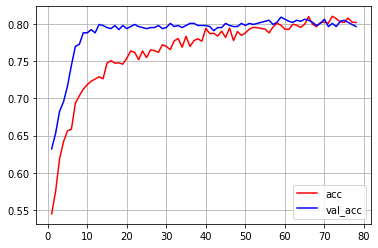

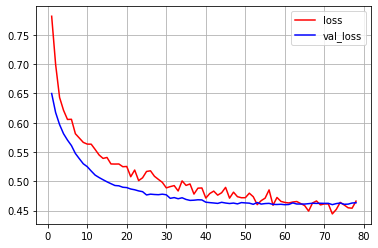

In [25]:
average_a_history = [np.mean([x[i] for x in a_all_scores]) for i in range(num_epochs)]
average_b_history = [np.mean([x[i] for x in b_all_scores]) for i in range(num_epochs)]
average_c_history = [np.mean([x[i] for x in c_all_scores]) for i in range(num_epochs)]
average_d_history = [np.mean([x[i] for x in d_all_scores]) for i in range(num_epochs)]

plt.plot(range(1, len(average_a_history) + 1), average_a_history, color = "red", label="acc")
plt.plot(range(1, len(average_b_history) + 1), average_b_history, color = "blue", label="val_acc")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(range(1, len(average_c_history) + 1), average_c_history, color = "red", label="loss")
plt.plot(range(1, len(average_d_history) + 1), average_d_history, color = "blue", label="val_loss")
plt.legend()
plt.grid(True)
plt.show()